In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [0]:
import missingno as msno
%matplotlib inline

In [0]:
test = pd.read_csv('/content/drive/My Drive/test_25000.csv')

# **Análisis Exploratorio**

## 1) Luego de cargar la data y analizar sus valores, identifique la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas. Sumado a lo anterior, identifique y establezca un protocolo para tratar outliers.

In [9]:
test.shape

(25000, 111)

El Dataset 'test' contiene 111 columnas y 25000 filas, hay una columna que es 'Unnamed: 0' la cual sera eliminada ya que no aporta. Hay columnas que tienen datos que son respuestas a las preguntas de la encuesta las cuales van de 1 a 5, otras columnas contiene los milisegundos usados en cada respuesta. Dividiremos las columnas en esos 2 primeros y eliminaremos las columnas que no tienen relacion a tiempo.

In [0]:
#Eliminar columna 'Unnamed: 0'
test.drop('Unnamed: 0',axis=1,inplace=True)

In [0]:
#División de las columnas en 3 grupos
respuestas=test.loc[:,:'OPN10']
res_milisegundos=test.loc[:,'EXT1_E':].drop(columns=['dateload','screenw','screenh','IPC','country','lat_appx_lots_of_err','long_appx_lots_of_err'])

### 1.1) Analisis de **'respuestas'**

Este grupo solo contiene variables **Categóricas** ya que las preguntas son de 1 a 5 para categorizar respuestas que van desde __1: Desacuerdo__ a __5:De acuerdo__

#### **Datos nulos**

**Revisemos los datos nulos.**



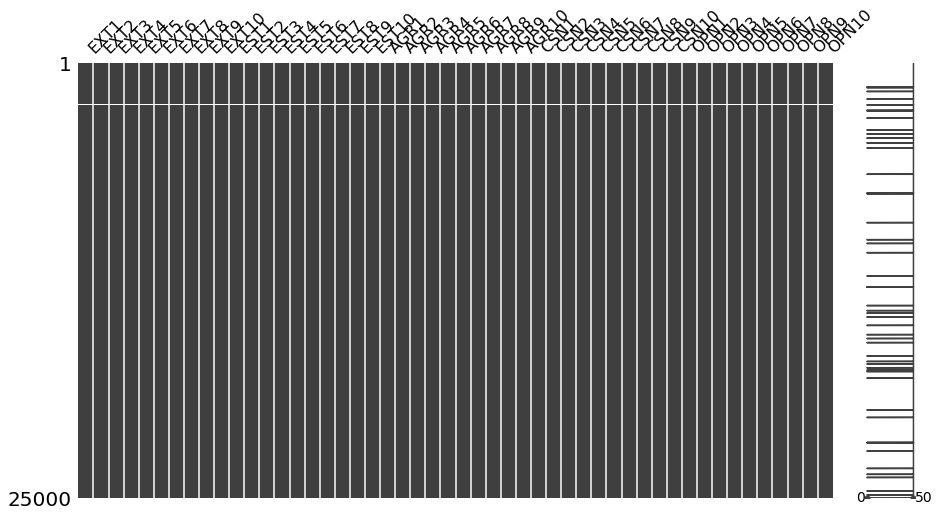

In [12]:
msno.matrix(respuestas,figsize=(15,8));

En el gráfico de misingno nos muestra una delgda linea que representa los datos nulos o vacios, veamos cuantos son del total de la muestra.

In [13]:
respuestas.isnull().sum()

EXT1     50
EXT2     50
EXT3     50
EXT4     50
EXT5     50
EXT6     50
EXT7     50
EXT8     50
EXT9     50
EXT10    50
EST1     50
EST2     50
EST3     50
EST4     50
EST5     50
EST6     50
EST7     50
EST8     50
EST9     50
EST10    50
AGR1     50
AGR2     50
AGR3     50
AGR4     50
AGR5     50
AGR6     50
AGR7     50
AGR8     50
AGR9     50
AGR10    50
CSN1     50
CSN2     50
CSN3     50
CSN4     50
CSN5     50
CSN6     50
CSN7     50
CSN8     50
CSN9     50
CSN10    50
OPN1     50
OPN2     50
OPN3     50
OPN4     50
OPN5     50
OPN6     50
OPN7     50
OPN8     50
OPN9     50
OPN10    50
dtype: int64

Se ve que de un total de 25000 datos solo 50 son datos perdidos o nan, asi que podemos considerar eliminarlos en el Item 2.

#### **Outliers**

In [14]:
respuestas.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.00000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000
mean,2.639158,2.793747,3.284569,3.158317,3.260962,2.403888,2.753267,3.42505,2.954990,3.571864,3.279238,3.164569,3.834469,2.654309,2.850822,2.827856,3.037715,2.677756,3.079158,2.775631,2.256673,3.829459,2.256513,3.929619,2.272946,3.735511,2.200762,3.679679,3.793387,3.594389,3.302445,2.934389,3.970220,2.617475,2.618277,2.832425,3.693347,2.466253,3.202725,3.589098,3.656713,2.068818,3.996112,2.002365,3.791463,1.887575,3.979679,3.183527,4.113226,3.954228
std,1.267854,1.324539,1.218051,1.239241,1.273524,1.226242,1.402961,1.26768,1.348112,1.299118,1.344585,1.234082,1.173962,1.254746,1.270702,1.322919,1.290402,1.337766,1.296988,1.327884,1.338232,1.138128,1.277898,1.121509,1.168433,1.226807,1.118341,1.101670,1.165181,1.080829,1.179911,1.398246,1.049401,1.252184,1.276112,1.416852,1.132576,1.142272,1.280472,1.057136,1.154760,1.108721,1.100844,1.095775,0.987029,1.099186,1.009449,1.255468,1.050970,1.034608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000

En este grupo, no se observan outliers o datos atípicos, ya que el máximo en todas las columnas es el 5 y el mínimo el 0.

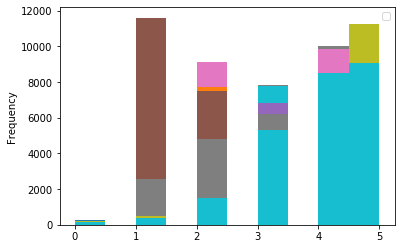

In [15]:
respuestas.plot.hist( )
plt.legend('');

Este primer grupo **'respuestas'** se ve que el valor minimo es 0 y el maximo es 5, siendo que la encuesta parte de 1 y termina en 5, asi que viendo el histograma observamos que el % de los 0 en cada columna es bajo. Creo que reemplazar ese '0'  con el valor 3 que es (Neutral, en las respuestas de la encuesta) sería una buena opción. 

<!-- # ceros=respuestas[respuestas==0].count()
# total=len(respuestas)
# porcentaje=(ceros/total)*100
# porcentaje -->

### 1.2) Analisis de **'res_milisegundos'**

En este grupo se encuentran solo variables **Cuantitativas** ya que estas miden en números cuanto tiempo se demoraron en contestar las personas cada pregunta de la encuesta.

#### **Datos nulos**

Revisemos datos nulos (nan) en este grupo

In [16]:
res_milisegundos.isnull().sum()

EXT1_E         50
EXT2_E         50
EXT3_E         50
EXT4_E         50
EXT5_E         50
EXT6_E         50
EXT7_E         50
EXT8_E         50
EXT9_E         50
EXT10_E        50
EST1_E         50
EST2_E         50
EST3_E         50
EST4_E         50
EST5_E         50
EST6_E         50
EST7_E         50
EST8_E         50
EST9_E         50
EST10_E        50
AGR1_E         50
AGR2_E         50
AGR3_E         50
AGR4_E         50
AGR5_E         50
AGR6_E         50
AGR7_E         50
AGR8_E         50
AGR9_E         50
AGR10_E        50
CSN1_E         50
CSN2_E         50
CSN3_E         50
CSN4_E         50
CSN5_E         50
CSN6_E         50
CSN7_E         50
CSN8_E         50
CSN9_E         50
CSN10_E        50
OPN1_E         50
OPN2_E         50
OPN3_E         50
OPN4_E         50
OPN5_E         50
OPN6_E         50
OPN7_E         50
OPN8_E         50
OPN9_E         50
OPN10_E        50
introelapse    57
testelapse     50
endelapse       0
dtype: int64

se puede observar que hay entre 50 y 57 datos nulos de 250000 datos, podemos condiderar llenarlos con alguna medida o eliminarlos. Lo veremos mas adelante.

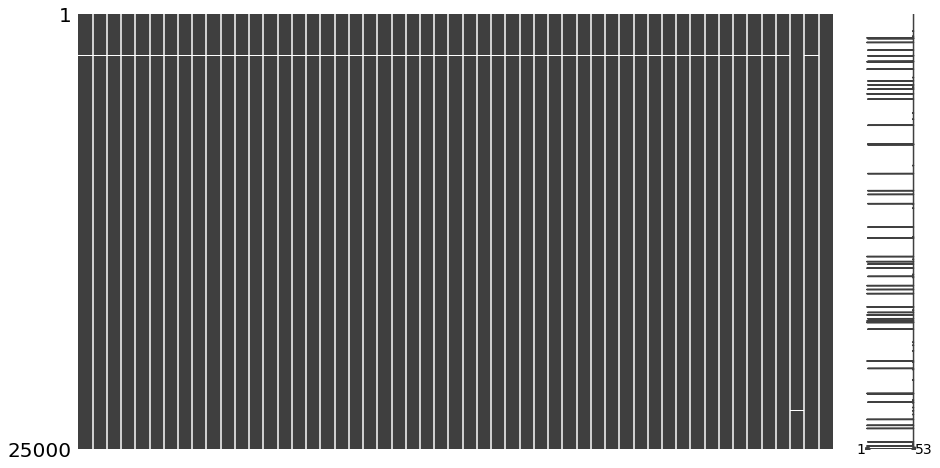

In [17]:
msno.matrix(res_milisegundos,figsize=(15,8));

Se observa una delgada linea en la parte superior del gráfico de misingno en donde estan los datos nulos(nan). Se puede considerar eliminar o reemplazar. Lo haremos en el item 2

#### **Outliers**

In [18]:
res_milisegundos.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
0,34288.0,3139.0,4290.0,8120.0,4887.0,3284.0,4803.0,8372.0,3516.0,3053.0,11272.0,7033.0,4518.0,4769.0,4135.0,11371.0,7881.0,568.0,2770.0,834.0,5186.0,7763.0,9496.0,3648.0,3685.0,1271.0,3134.0,10108.0,4436.0,6036.0,7189.0,3873.0,5720.0,23645.0,3385.0,10124.0,3138.0,3169.0,2631.0,4134.0,9839.0,9659.0,8626.0,8241.0,3882.0,3482.0,915.0,7191.0,4831.0,3256.0,44.0,317.0,14
1,5739.0,4928.0,1856.0,2424.0,1728.0,2280.0,2600.0,568.0,2248.0,3528.0,5128.0,1608.0,8120.0,6632.0,1712.0,0.0,9679.0,5664.0,4608.0,1952.0,3599.0,1840.0,2464.0,1616.0,2088.0,2832.0,2168.0,2456.0,5071.0,2016.0,1664.0,2008.0,2346.0,3088.0,3056.0,3480.0,2256.0,8248.0,1561.0,6527.0,2944.0,1936.0,5512.0,1704.0,992.0,4720.0,5672.0,704.0,744.0,808.0,6.0,161.0,6
2,3661.0,2178.0,4253.0,2087.0,2093.0,2045.0,2947.0,6583.0,3309.0,2811.0,3166.0,1846.0,2493.0,3607.0,3794.0,3989.0,4095.0,2958.0,2015.0,2282.0,4302.0,1796.0,1862.0,2640.0,5169.0,5255.0,4939.0,2417.0,2378.0,4177.0,3690.0,2642.0,3312.0,1945.0,4060.0,12921.0,3306.0,7281.0,4225.0,3273.0,3107.0,3615.0,2890.0,4142.0,5554.0,4058.0,7034.0,2744.0,3123.0,4708.0,9.0,185.0,22
3,43304.0,2033.0,3139.0,2016.0,1666.0,3637.0,2831.0,17787.0,4751.0,1812.0,1715.0,2418.0,1924.0,2173.0,2896.0,8569.0,1738.0,2200.0,3637.0,2306.0,3865.0,3049.0,1820.0,7000.0,4396.0,1763.0,2984.0,2940.0,2112.0,2315.0,1317.0,6166.0,2138.0,2111.0,2607.0,2584.0,3446.0,2036.0,1708.0,2873.0,1887.0,2227.0,1800.0,3832.0,2349.0,5535.0,2315.0,2401.0,1962.0,1490.0,6.0,199.0,13
4,6687.0,3201.0,7233.0,15784.0,2500.0,3514.0,2816.0,2233.0,2300.0,2638.0,2702.0,16333.0,4349.0,2449.0,8717.0,2215.0,2868.0,2328.0,2501.0,2701.0,2297.0,2669.0,7948.0,1569.0,11234.0,2070.0,2551.0,2918.0,2199.0,2535.0,28584.0,3850.0,19923.0,5064.0,2401.0,4249.0,2749.0,2051.0,2718.0,2433.0,18449.0,11936.0,2198.0,2385.0,3268.0,2219.0,2650.0,3288.0,2094.0,2915.0,16.0,260.0,9


Este dataset **'res_milisegundos'** contiene (en milisegundos) cuanto se demoró la persona en responder las preguntas. A gusto personal, cambiare los milisegundos a segundos, y los redondeare para tener una mejor visual de los datos.

In [0]:
res_milisegundos.loc[:,'EXT1_E':'OPN10_E']=res_milisegundos.loc[:,'EXT1_E':'OPN10_E'].divide(1000).round()

In [0]:
res_segundos=res_milisegundos

In [21]:
res_segundos.describe().style.highlight_min(color='yellow')

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
count,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24950,24943,24950,25000
mean,65.4611,5.72762,31.7027,5.67279,5.38942,5.42613,6.09222,5.79315,5.82966,10.6349,6.62629,11.307,7.8204,10.5771,7.30737,6.77832,8.28297,8.87852,5.15399,4.85968,16.1705,5.6186,5.60192,6.36473,6.5889,12.9819,6.44838,5.78661,4.75142,8.0693,16.2816,6.82441,5.47816,5.70184,6.4119,14.9972,4.78525,8.05331,4.57952,6.62754,4.85747,13.1595,5.39022,10.1016,5.15339,6.28701,5.60725,4.46886,5.60104,3.73018,1536.23,561.036,952.614
std,1433.15,69.373,3840.18,30.4098,66.5023,91.9468,24.0369,61.9344,84.0136,951.619,168.252,813.304,370.803,412.62,156.651,181.64,379.11,590.15,144.528,83.5091,573.032,50.3674,56.5202,106.758,65.9056,1063.03,75.5502,24.4801,32.1852,462.984,1111.74,54.4954,43.8265,44.5953,63.3481,1235.68,49.9017,40.9236,49.2832,23.2747,29.7439,410.879,61.2699,416.663,76.4124,143.975,50.0494,21.2932,134.526,38.2857,94431.5,7751.25,36618.8
min,0,-14,-23,0,0,0,0,0,0,-4,-70,0,0,-5,-49,0,0,-92,0,0,-54,0,-36,0,-3,-5,-14,0,-1,-3,0,0,-3,0,-15,0,0,0,0,-1,0,0,0,0,0,0,-13,0,0,-1,0,1,1
25%,5,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,3,2,3,3,2,2,2,3,2,2,3,3,2,2,2,3,2,3,2,3,2,2,2,2,2,1,5,171,9
50%,7,3,4,3,3,3,4,4,4,3,3,4,3,4,3,3,3,3,3,3,4,3,3,3,4,3,4,4,3,3,4,4,3,3,4,4,3,4,3,4,3,4,3,4,3,3,3,3,3,2,10,223,13
75%,12,5,5,5,5,5,6,5,5,5,5,5,4,6,5,5,5,4,4,4,7,5,5,5,6,4,5,6,5,5,5,6,5,5,5,6,4,7,4,6,5,6,4,6,4,5,5,4,5,3,30,313,18
max,85260,9536,605906,3267,8729,13216,2295,8093,12247,150252,25977,128268,54627,57517,18591,27780,50585,92585,22599,10850,69084,5242,6412,14856,8407,166636,7389,2710,3104,72919,160638,7895,3427,5078,8974,194729,5843,4358,7055,2402,3535,51975,7127,62289,9608,21346,4476,2738,21198,5318,1.45623e+07,705543,3.2437e+06


En este **describe** se puede observar __con color amarilo__ que los valores mínimos contiene segundos en 0 y otros negativos ¿estaran bien esos datos negativos? o ¿una persona se puede demorar 0 segundos en responder?. Esos datos se ven que son atípicos, trataremos estos datos más adelante

El **describe**, tambien muestra el valor **maximo** de las columnas. Hay algo raro ahi... analizemos

In [22]:
#Elijamos la primera columna EXT1_E la cual esta en segundos y lo dividimos en 3600 para obtener una medida mayor, en este caso en horas
res_segundos.EXT1_E.aggregate(('min','max'))/3600

min     0.000000
max    23.683333
Name: EXT1_E, dtype: float64

El **maximo** es en horas ¿Alguien se puede demorar 23 hrs en elegir una opción? hay varias columnas que muestran datos así. Otro dato atípico para Analizar posteriormente ya sea para reemplazar o eliminar.

## 2) Genere un nuevo Dataframe que excluya datos nulos y outliers en función a lo indicado en el paso anterior. A partir del mismo, genere un análisis exploratorio basándose en variables de su interés.

### Nulos
Considerando todo lo mencionado en el punto 1, eliminaremos los datos nulos de los 2 grupos

In [0]:
respuestas.dropna(inplace=True)
res_segundos.dropna(inplace=True)

### Outliers

En cuanto a **outliers**, es dificil tratar todo de golpe ya que cada hay columnas con datos numericos pero categoricos y otros que contiene datos cuantitativos. Asi que trataremos cada grupo de forma independiente segun lo expresado en el punto 1.

Segun lo que se habla en el punto **1.1-Outliers** reemplzaremos los datos que estan en 0 por 3 y no hay outliers ya que el max en todas las columnas es 5

Es el momento de volver a unir los grupos en un solo DataFrame y asi excluir los datos nulos y outliers.

In [0]:
respuestas[respuestas==0]=3

Segun en el punto **1.2-Outliers** hay datos = 0 y negativos usaremos la media para reemplazar esos valores. Para normalizar los mayores, todo lo que sea mayor al quantile 0.95 se cambiara a la media truncada.

In [0]:
res_segundos = res_segundos.where(~(res_segundos<=0),res_segundos.mean(),axis=1)
res_segundos = res_segundos.where(~(res_segundos>(res_segundos.quantile(0.9))),res_segundos.mean(),axis=1)

In [26]:
res_segundos.describe()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
count,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.00000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000
mean,13.988545,3.792301,6.158462,3.833016,3.418002,3.454987,4.592689,3.951035,3.98453,4.012723,3.819361,4.547573,3.429689,4.651856,3.940628,3.741593,3.818831,3.706903,3.178861,2.981857,5.824206,3.681020,3.594749,3.679098,4.456487,4.074319,4.087152,4.194111,3.402381,3.967554,5.027158,4.640221,3.615328,3.721768,4.057769,5.456928,3.242742,5.031250,3.197367,4.483863,3.338718,5.318491,3.188409,4.562901,3.234659,3.801638,3.574385,3.324898,3.625044,2.444571,169.047727,261.750159,100.900638
std,17.908938,1.734666,8.121846,1.744253,1.564835,1.572713,1.891108,1.738436,1.73131,2.542197,1.932835,2.866488,2.017267,2.940490,1.836800,1.899788,2.133247,2.270287,1.561940,1.521824,4.220172,1.732281,1.703741,1.839020,1.910465,3.284580,1.784898,1.863879,1.479171,2.075509,4.180765,2.101389,1.661457,1.719245,1.905366,3.596072,1.484182,3.495688,1.497894,2.316747,1.534745,3.269899,1.606554,2.570347,1.538316,1.781420,1.582647,1.453409,1.578796,1.150853,456.438184,128.502275,274.392201
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,171.000000,9.000000
50%,7.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.00000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,10.000000,223.000000,13.000000
75%,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.793538,5.00000,5.000000,5.000000,6.000000,4.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.872569,4.812060,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,4.000000,7.000000,4.000000,6.000000,4.937637,6.000000,4.000000,6.000000,4.000000,5.000000,5.000000,4.470480,5.000000,3.000000,30.000000,313.000000,18.000000
max,66.0615

In [0]:
res_segundos=res_segundos.round(0)

In [28]:
res_segundos.head()


,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
0,66.0,3.0,4.0,8.0,5.0,3.0,5.0,8.0,4.0,3.0,7.0,7.0,5.0,5.0,4.0,7.0,8.0,1.0,3.0,1.0,5.0,8.0,6.0,4.0,4.0,1.0,3.0,6.0,4.0,6.0,7.0,4.0,6.0,6.0,3.0,10.0,3.0,3.0,3.0,4.0,5.0,10.0,5.0,8.0,4.0,3.0,1.0,7.0,5.0,3.0,44.0,317.0,14.0
1,6.0,5.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,4.0,5.0,2.0,8.0,7.0,2.0,7.0,8.0,6.0,5.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,8.0,2.0,7.0,3.0,2.0,6.0,2.0,1.0,5.0,6.0,1.0,1.0,1.0,6.0,161.0,6.0
2,4.0,2.0,4.0,2.0,2.0,2.0,3.0,7.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,15.0,3.0,7.0,4.0,3.0,3.0,4.0,3.0,4.0,6.0,4.0,7.0,3.0,3.0,5.0,9.0,185.0,22.0
3,66.0,2.0,3.0,2.0,2.0,4.0,3.0,6.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,2.0,2.0,4.0,2.0,4.0,3.0,2.0,7.0,4.0,2.0,3.0,3.0,2.0,2.0,1.0,6.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,6.0,2.0,2.0,2.0,1.0,6.0,199.0,13.0
4,7.0,3.0,7.0,6.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,11.0,4.0,2.0,7.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,8.0,2.0,7.0,2.0,3.0,3.0,2.0,3.0,17.0,4.0,6.0,5.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,13.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,16.0,260.0,9.0


## 3) Reporte las medias de cada una de las preguntas del test. (Hint: Puede utilizar dotplot para ello). Junto a ello, implemente un análisis de correlaciones lineales y analice detalladamente. 

¿Qué comportamientos podemos observar en ambos gráficos? Comente los principales hallazgos.

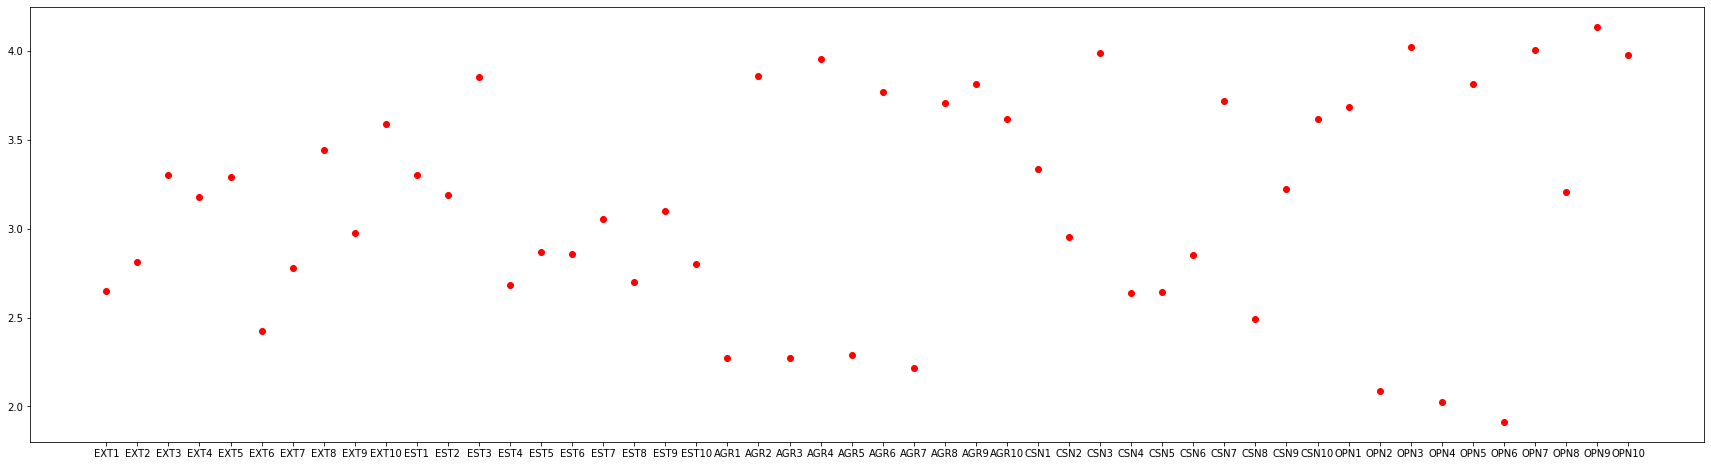

In [29]:
plt.figure(figsize=(30,8))
plt.plot(respuestas.mean(),'ro');

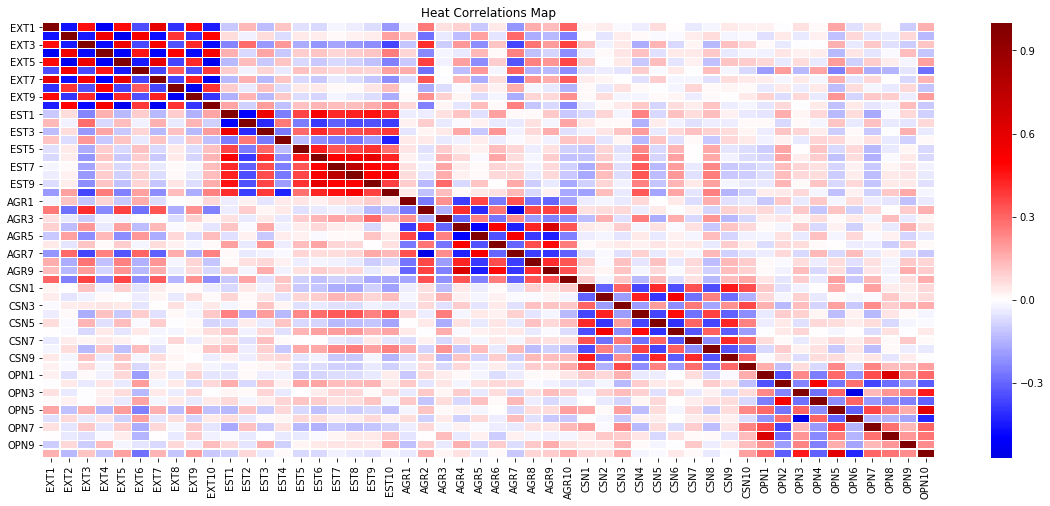

In [30]:
plt.figure(figsize=(20,8))
plt.title("Heat Correlations Map")
sns.heatmap(respuestas.corr(), cmap='seismic',center=0,annot=False,linewidths=.2,xticklabels=True) 

# **Analisis Factorial**

In [31]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.2MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=7a7c950443d26c2f39eb3990537d1226d71883f0663f2ad8ef1003e17ef9cdd2
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [0]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

## 4) Para la realización de un análisis factorial, se debe verificar que se cumplan ciertos supuestos sobre la data a analizar. En particular, ejecutar las pruebas de 1. Esfericidad de Barlett y 2. Kaiser-Meyer-Olkin. 
Investigue sobre las razones por las cuales se deben implementar estos test y explíquelo brevemente. Luego de ello, implemente los test y comente los resultados.




**1. Esfericidad de Barlett**

El test de **Esfericidad de Barlett** sirve para comparar si la matriz de correlaciones es igual a una matriz de identidad, lo cual indicaria que el modelo factorial es inadecuado.
* **Hipotesis Nula**: Matriz de Correlacion es igual a Matriz de identidad.
* **Hipotesis Alternativa**: No son iguales la Matriz de Correlacion a la Matriz de Identidad. Por lo tanto es viable realizar la Factorización. y Eso se ve por P_Value el cual tiene que ser menor a 0.05 en este caso es 0.0

In [33]:
chi_square_value,p_value=calculate_bartlett_sphericity(respuestas)
print(f'Valor chi-cuadrado: {chi_square_value}, P-value: {p_value}')

Valor chi-cuadrado: 474003.6182084787, P-value: 0.0


**2. Kaiser-Meyer-Olkin**

El test **Kaiser-Meyer-Olkin (KMO)** sirve para comparar los valores de las correlaciones entre las variables y sus correlaciones parciales. Ya que la correlacion entre dos de ellas puede estar influenciada por las otras. Si el indice **KMO** esta proximo a **1**, es viable realizar la Factorizacion.

In [0]:
kmo_all,kmo_model=calculate_kmo(respuestas)

In [35]:
print(f'El modelo KMO es:{kmo_model.round(1)}','por lo tanto:','es viable realizar la Factorización' if kmo_model>0.6 else 'no es viable realizar la Factorización')

El modelo KMO es:0.9 por lo tanto: es viable realizar la Factorización


## 5) Para la generación del análisis factorial, se puede recurrir a la librería factor_analyzer.

Instancie un objeto con FactorAnalyzer(), donde se estimen 15 dimensiones latentes y no se aplique rotación.


In [0]:
fa = FactorAnalyzer(15, rotation=None).fit(respuestas)

## 6) Investigue sobre el significado de “eigenvalues” en el contexto de un análisis Factorial. Luego, genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables. 

Para obtener los eigenvalues, puede usar “get_eigenvalues()” de factor_analyzer.


**Eigenvalues** es una medida de cuanto la varianza de las variables observadas explica un factor.

In [0]:
ev, v = fa.get_eigenvalues()

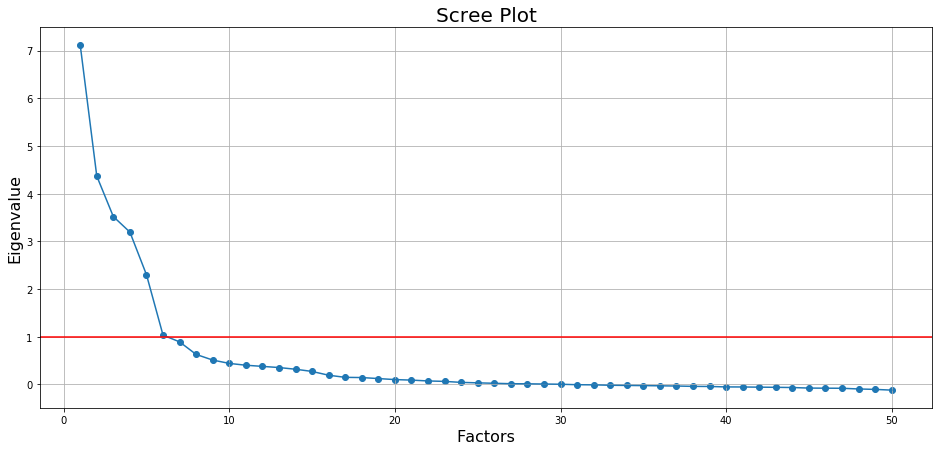

In [38]:
plt.figure(figsize=(16,7))
plt.scatter(range(1,respuestas.shape[1]+1),v)
plt.plot(range(1,respuestas.shape[1]+1),v)
plt.title('Scree Plot',fontdict={'fontsize':20})
plt.xlabel('Factors',fontdict={'fontsize':16})
plt.ylabel('Eigenvalue',fontdict={'fontsize':16})
plt.axhline(1,color='r')
plt.grid()
plt.show()

## 7) Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.


In [0]:
fact= v[v>1]

In [0]:
fa2 = FactorAnalyzer(len(fact), rotation=None).fit(respuestas)

## 8) Extraiga las cargas del modelo e identifique qué ítems están asociados a cada factor. Puede utilizar “loadings_” de factor_analyzer para ello. 

Comente sobre qué significa cada factor construído, conceptualmente.


In [41]:
loading=pd.DataFrame(fa2.loadings_).abs()
loading.style.apply(lambda x: ['Background: yellow' if v > 0.4 else '' for v in x])
# loading.applymap(lambda x: np.where(x<0.4,'',round(x,3)))

,0,1,2,3,4,5
0,0.524992,0.246571,0.325327,0.103896,0.202729,0.117169
1,0.524978,0.317043,0.293581,0.0934221,0.177981,0.155936
2,0.680703,0.121776,0.175852,0.191919,0.0358236,0.108741
3,0.576819,0.183315,0.360681,0.130637,0.219328,0.166043
4,0.646987,0.264545,0.18545,0.105084,0.172457,0.0246535
5,0.530692,0.231787,0.146701,0.134543,0.125102,0.209244
6,0.592372,0.253418,0.274451,0.136293,0.159717,0.0728021
7,0.392365,0.194516,0.353599,0.0334626,0.189449,0.0800466
8,0.47075,0.197406,0.348346,0.0306934,0.200891,0.0613121
9,0.563449,0.136435,0.313318,0.117808,0.162013,0.141523


Como se puede observar en la celda anterior, los valores que estan resaltados en amarillo, son todos aquellos que estan por sobre 0.4 y representan el peso de una pregunta del test sobre el factor y asi se puedan agrupar en un nuevo concepto que las represente.

In [42]:
loading[loading>0.4].count()

0    17
1    10
2     4
3     9
4     0
5     0
dtype: int64

# **Regresión**

In [0]:
import statsmodels.api as sm
from statsmodels.api import add_constant

## 9) En base a las los factores construidos, genere una regresión lineal, para analizar si alguno de los factores de personalidad influye en el tiempo de respuesta. 

Para lo anterior, requerirá de unir la columna que incluye el tiempo de respuesta, con los coeficientes generador por FactorAnalyzer, pudiendo utilizar “transform()” de factor_analyzer para obtener estos coeficientes.

De existir factores relevantes, indique cual es el que repercute más en la regresión.


In [0]:
respuestasfac=pd.DataFrame(fa2.transform(respuestas)).abs().reset_index(drop=True).rename(columns={0:'Factor1',1:'Factor2',2:'Factor3',3:'Factor4',4:'Factor5',5:'Factor6',})

In [45]:
res_segundos.reset_index(drop=True)
final_test = pd.concat([respuestasfac,res_segundos],axis=1, join='inner')
final_test

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
0,0.153441,0.619737,0.641794,0.644507,1.403397,1.778850,66.0,3.0,4.0,8.0,5.0,3.0,5.0,8.0,4.0,3.0,7.0,7.0,5.0,5.0,4.0,7.0,8.0,1.0,3.0,1.0,5.0,8.0,6.0,4.0,4.0,1.0,3.0,6.0,4.0,6.0,7.0,4.0,6.0,6.0,3.0,10.0,3.0,3.0,3.0,4.0,5.0,10.0,5.0,8.0,4.0,3.0,1.0,7.0,5.0,3.0,44.0,317.0,14.0
1,0.300060,0.685934,1.476463,0.485810,0.659526,0.055904,6.0,5.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,4.0,5.0,2.0,8.0,7.0,2.0,7.0,8.0,6.0,5.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,8.0,2.0,7.0,3.0,2.0,6.0,2.0,1.0,5.0,6.0,1.0,1.0,1.0,6.0,161.0,6.0
2,2.024072,0.461765,1.366467,0.095449,0.948508,1.105649,4.0,2.0,4.0,2.0,2.0,2.0,3.0,7.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,15.0,3.0,7.0,4.0,3.0,3.0,4.0,3.0,4.0,6.0,4.0,7.0,3.0,3.0,5.0,9.0,185.0,22.0
3,0.247374,2.659018,0.167469,2.111831,1.014383,0.503068,66.0,2.0,3.0,2.0,2.0,4.0,3.0,6.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,2.0,2.0,4.0,2.0,4.0,3.0,2.0,7.0,4.0,2.0,3.0,3.0,2.0,2.0,1.0,6.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,6.0,2.0,2.0,2.0,1.0,6.0,199.0,13.0
4,0.185062,1.493418,0.034751,0.381161,0.730855,0.218234,7.0,3.0,7.0,6.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,11.0,4.0,2.0,7.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,8.0,2.0,7.0,2.0,3.0,3.0,2.0,3.0,17.0,4.0,6.0,5.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,13.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,16.0,260.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24945,0.482227,0.621544,0.014938,0.119954,0.420362,0.821531,66.0,6.0,32.0,6.0,5.0,5.0,6.0,8.0,6.0,7.0,7.0,11.0,8.0,11.0,7.0,7.0,7.0,9.0,5.0,5.0,16.0,6.0,6.0,6.0,7.0,13.0,7.0,6.0,5.0,8.0,17.0,7.0,5.0,6.0,6.0,15.0,5.0,8.0,5.0,7.0,5.0,13.0,5.0,10.0,5.0,6.0,7.0,5.0,6.0,4.0,1.0,433.0,954.0
24946,0.115252,0.582981,1.160337,0.182668,0.480605,0.003061,66.0,3.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,5.0,3.0,6.0,2.0,3.0,5.0,3.0,3.0,1.0,2.0,3.0,5.0,6.0,2.0,2.0,3.0,2.0,3.0,7.0,6.0,4.0,5.0,7.0,3.0,4.0,3.0,4.0,4.0,14.0,2.0,4.0,2.0,2.0,3.0,6.0,2.0,3.0,4.0,3.0,7.0,3.0,4.0,254.0,14.0
24947,0.529242,0.601677,1.374049,0.795855,1.631170,0.952773,66.0,6.0,2.0,3.0,5.0,3.0,5.0,3.0,5.0,2.0,5.0,3.0,8.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,4.0,3.0,2.0,7.0,6.0,7.0,3.0,2.0,3.0,8.0,4.0,5.0,2.0,3.0,2.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,13.0,561.0,13.0
24948,0.372996,0.167818,0.520423,1.201202,0.078501,0.694549,6.0,6.0,4.0,3.0,2.0,4.0,5.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,4.0,2.0,4.0,3.0,3.0,4.0,2.0,7.0,5.0,2.0,2.0,2.0,1.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,5.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,3.0,2.0,52.0,561.0,13.0


In [46]:
X = final_test.iloc[:,0:6]
Y = final_test['testelapse']

X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
predicciones = modelo.predict(X) 

print_model = modelo.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             testelapse   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.337
Date:                Thu, 19 Dec 2019   Prob (F-statistic):              0.237
Time:                        14:51:41   Log-Likelihood:            -1.5605e+05
No. Observations:               24866   AIC:                         3.121e+05
Df Residuals:                   24859   BIC:                         3.122e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.9772      2.677     99.366      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# **Bonus**

## 10) Proponga otra regresión lineal o análisis factorial que sea relevante para efectos de la encuesta. ¿Qué puede concluir de aquel análisis?


Ya que los **Factores** no explicaron el modelo, cambiaremos las variables dependientes, en este caso usaremos las columnas que tienen el tiempo en responder cada pregunta de la encuesta.

In [47]:
X1 = final_test.loc[:,'EXT1_E':'OPN10_E']
Y1 = final_test['testelapse']

X1 = sm.add_constant(X1)
modelo1 = sm.OLS(Y1, X1).fit()
predicciones1 = modelo1.predict(X1) 

print_model1 = modelo1.summary()
print(print_model1)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             testelapse   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     532.3
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:51:42   Log-Likelihood:            -1.4699e+05
No. Observations:               24866   AIC:                         2.941e+05
Df Residuals:                   24815   BIC:                         2.945e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.5350      2.430    -13.798      0.0

In [48]:
print(f'Aqui observamos un R-cuadrado de:{modelo1.rsquared_adj.round(3)} lo cual nos explica en un {modelo1.rsquared_adj.round(3)*100}% el modelo')

Aqui observamos un R-cuadrado de:0.517 lo cual nos explica en un 51.7% el modelo


Quedemonos con las variables independientes con un **P_value** = 0

In [0]:
#obtengo los P_values
mod=modelo1.pvalues.round(3)
#solo me quedo con los valores = 0 y elimino el indice 'const'
mod=mod[mod==0].drop('const')

Ahora usemos esas variables en un nuevo modelo

In [50]:
#Modelo de regresion solo con los P_values = 0
Xmod = final_test.loc[:,mod.index]
Ymod = final_test['testelapse']

Xmod = sm.add_constant(Xmod)
modelo_mod = sm.OLS(Ymod, Xmod).fit()
predicciones_mod = modelo_mod.predict(Xmod) 

print_model_mod = modelo_mod.summary()
print(print_model_mod)

                            OLS Regression Results                            
Dep. Variable:             testelapse   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     906.4
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:51:42   Log-Likelihood:            -1.4708e+05
No. Observations:               24866   AIC:                         2.942e+05
Df Residuals:                   24836   BIC:                         2.945e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.6013      2.258    -11.336      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Comparemos ambos modelos

In [51]:
print(f'El primer modelo se explica en un: {modelo.rsquared_adj.round(3)*100}%, el segundo en un: {modelo1.rsquared_adj.round(3)*100}% y el tercero en un: {modelo_mod.rsquared_adj.round(3)*100}%')

El primer modelo se explica en un: 0.0%, el segundo en un: 51.7% y el tercero en un: 51.4%


A pesar de cambiar las variables independientes en los 2 ultimos modelos, no podemos usar el modelo para predecir, ya que un modelo es mejor explicado cuando su **R_Cuadrado** es mayor al **80.0%**